In [1]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import dask.dataframe as dd

data_list = []
for filename in os.listdir('mct31_data'):
    if filename in ['mct31_7월2주차.csv', 'mct31_7월3주차.csv', 'mct31_7월4주차.csv']:
        continue
    raw_data = dd.read_csv('mct31_data/' + filename, dtype={'F_RunState': 'object'})
    raw_data['GDatetime'] = dd.to_datetime(raw_data['GDatetime']).dt.round('S')
    raw_data = raw_data.compute()  # Dask DataFrame을 Pandas DataFrame으로 변환
    raw_data = raw_data.set_index('GDatetime')
    raw_data['F_RunState'] = raw_data['F_RunState'].fillna('0')
    raw_data['F_RunState'] = raw_data['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
    raw_data['F_OperationTime'] = raw_data['F_OperationTime'].fillna(0)
    raw_data['F_CuttingTime'] = raw_data['F_CuttingTime'].fillna(0)
    raw_data['F_ToolNum'] = raw_data['F_ToolNum'].bfill()
    raw_data = raw_data.drop(['F_AbsoluteX', 'F_AbsoluteY', 'F_AbsoluteZ', 'F_DistanceX', 'F_DistanceY', 'F_DistanceZ'], axis=1)
    data_list.append(raw_data.iloc[:, :-6])

df1 = data_list[0]
df2 = data_list[1]
df3 = data_list[2]
df4 = data_list[3]
df5 = data_list[4]
df6 = data_list[5]
df7 = data_list[6]
df8 = data_list[7]

data = pd.concat([df4,df5,df6,df7], axis=0)
data_all = pd.concat(data_list, axis=0)

# Calculate the shifted differences
diffs = np.diff(data['F_ToolNum'], prepend=data['F_ToolNum'][0])

# Initialize transformed list
transformed = [0]  # starting with 0 as the first value

# Iterate over the differences and build the transformed list
for i in range(1, len(diffs)):
    if diffs[i] == 0:
        transformed.append(transformed[i-1])
    else:
        transformed.append(data['F_ToolNum'][i-1])
data['F_ToolNum'] = transformed

data['G_MP'] = data['G_MV'] * data['G_MA']

data

,F_RunState,F_OperationTime,F_CuttingTime,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_ADC4,G_MV,G_MA,G_MActP,G_MRActP,G_MPF,G_MFeq,G_MTemp,G_MP
GDatetime,,,,,,,,,,,,,,,,,,,,
2023-06-05 07:03:45,2,901411.0,111121.0,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,0.56,222.020004,2.974,0.924,0.628,0.701,59.970001,39.0,660.287488
2023-06-05 07:03:46,2,901411.0,111121.0,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,0.56,221.529999,2.976,0.924,0.624,0.700,59.970001,39.0,659.273292
2023-06-05 07:03:47,2,901411.0,111121.0,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,0.56,221.529999,2.976,0.924,0.624,0.700,59.970001,39.0,659.273292
2023-06-05 07:03:48,2,901411.0,111121.0,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,0.56,220.729996,2.976,0.920,0.624,0.700,59.959999,39.0,656.892483
2023-06-05 07:03:49,2,901411.0,111121.0,0,0.0,0.0,0.0,0.0,24.299999,43.700001,0.0,0.56,221.630005,2.962,0.920,0.628,0.701,59.959999,39.0,656.468051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 23:59:55,0,0.0,0.0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,0.56,222.529999,0.064,0.004,0.004,0.255,59.990002,43.0,14.241921
2023-07-02 23:59:56,0,0.0,0.0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,0.56,222.529999,0.064,0.004,0.004,0.255,59.990002,43.0,14.241921
2023-07-02 23:59:57,0,0.0,0.0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,0.56,222.679993,0.063,0.004,0.004,0.256,59.990002,43.0,14.028840


In [3]:
mask1 = (data.index >= pd.Timestamp('2023-06-13 15:31:06')) & (data.index <= pd.Timestamp('2023-06-13 16:40:28'))
mask2 = (data.index >= pd.Timestamp('2023-06-14 02:24:35')) & (data.index <= pd.Timestamp('2023-06-14 03:32:12'))
mask3 = (data.index >= pd.Timestamp('2023-06-05 19:35:30')) & (data.index <= pd.Timestamp('2023-06-05 20:44:09'))
mask4 = (data.index >= pd.Timestamp('2023-06-16 09:21:54')) & (data.index <= pd.Timestamp('2023-06-16 10:29:53'))
mask5 = (data.index >= pd.Timestamp('2023-06-09 06:46:59')) & (data.index <= pd.Timestamp('2023-06-09 07:57:42'))
mask5 = (data.index >= pd.Timestamp('2023-06-09 06:46:59')) & (data.index <= pd.Timestamp('2023-06-09 07:57:42'))
mask6 = (data.index >= pd.Timestamp('2023-06-28 02:51:01')) & (data.index <= pd.Timestamp('2023-06-28 04:03:40'))

# 두 마스크를 합침
combined_mask = mask1 | mask2 | mask3 | mask4 | mask5 | mask6

selected_data = data[combined_mask]
selected_data

,F_RunState,F_OperationTime,F_CuttingTime,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_ADC4,G_MV,G_MA,G_MActP,G_MRActP,G_MPF,G_MFeq,G_MTemp,G_MP
GDatetime,,,,,,,,,,,,,,,,,,,,
2023-06-05 19:35:30,1,995513.0,173750.0,0,0.0,0.0,712.0,21.0,34.799999,30.900000,0.0,0.56,217.419998,11.170,2.688,2.980,0.553,59.980000,43.0,2428.581396
2023-06-05 19:35:31,1,995514.0,173750.0,1,0.0,0.0,712.0,21.0,34.799999,30.900000,0.0,0.56,217.419998,11.170,2.688,2.980,0.553,59.980000,43.0,2428.581396
2023-06-05 19:35:32,1,995515.0,173750.0,2,0.0,0.0,712.0,21.0,34.799999,30.900000,0.0,0.56,218.279999,12.793,2.840,3.724,0.508,59.980000,43.0,2792.456073
2023-06-05 19:35:33,1,995516.0,173750.0,3,0.0,0.0,712.0,21.0,34.700001,30.900000,0.0,0.56,217.619995,12.816,2.860,3.700,0.512,59.980000,43.0,2789.017854
2023-06-05 19:35:34,1,995517.0,173750.0,4,0.0,0.0,712.0,21.0,34.700001,30.900000,0.0,0.56,217.619995,12.816,2.860,3.700,0.512,59.980000,43.0,2789.017854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 04:03:36,1,171955.0,285626.0,10425,0.0,0.0,712.0,21.0,34.599998,40.000000,0.0,0.56,215.360001,12.751,2.796,3.616,0.508,59.950001,44.0,2746.055455
2023-06-28 04:03:37,2,171955.0,285626.0,10425,0.0,0.0,712.0,21.0,34.599998,40.000000,0.0,0.56,215.360001,12.751,2.796,3.616,0.508,59.950001,44.0,2746.055455
2023-06-28 04:03:38,2,171955.0,285626.0,10425,0.0,0.0,712.0,21.0,34.700001,40.099998,0.0,0.56,215.729996,11.113,2.664,2.928,0.555,59.950001,44.0,2397.407424


In [4]:
# 완전한 시계열 인덱스 생성
# full_index = pd.date_range(start='2023-06-13 15:31:06', end='2023-06-13 16:40:28', freq='S')
full_index = pd.date_range(start=data.index.min(), end=data.index.max(), freq='S')

# 누락된 인덱스 찾기
missing_dates = full_index.difference(data.index)

pd.DataFrame(missing_dates)

,0
0,2023-06-05 07:04:10
1,2023-06-05 07:04:11
2,2023-06-05 07:04:12
3,2023-06-05 07:04:13
4,2023-06-05 07:04:14
...,...
42552,2023-07-02 23:41:25
42553,2023-07-02 23:45:20
42554,2023-07-02 23:49:04
42555,2023-07-02 23:53:03


In [4]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_sc = std.fit_transform(selected_data)

In [5]:
from keras.layers import LeakyReLU, Dropout, ReLU, BatchNormalization, Dense, Input
from keras.models import Model
from keras import layers

n_features = selected_data.shape[1]
latent_dim = 4

# Encoder
enc_inputs = Input(shape=(n_features,))
x = Dense(128)(enc_inputs)
x = BatchNormalization()(x)  # Moved BatchNormalization before activation
x = ReLU()(x)

x = Dense(64)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(32)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(16)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(8)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(4)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

enc_outputs = Dense(latent_dim)(x)

encoder = Model(inputs=enc_inputs, outputs=enc_outputs)

# Decoder
dec_inputs = Input(shape=(latent_dim,))
x = Dense(4)(dec_inputs)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(8)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(16)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(32)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(64)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

dec_outputs = Dense(n_features, activation='linear')(x)  # Can be changed based on data range
decoder = Model(inputs=dec_inputs, outputs=dec_outputs)

# Autoencoder
inputs = Input(shape=(n_features,))
latent = encoder(inputs)
outputs = decoder(latent)

AE = Model(inputs=inputs, outputs=outputs)
AE.compile(optimizer='adam', loss='mse', metrics='acc')
AE.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20)]              0         
                                                                 
 model (Functional)          (None, 4)                 14752     
                                                                 
 model_1 (Functional)        (None, 20)                14768     
                                                                 
Total params: 29,520
Trainable params: 28,512
Non-trainable params: 1,008
_________________________________________________________________


In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

history = AE.fit(X_train_sc, X_train_sc, validation_split=0.2, batch_size=256, epochs=1000, callbacks=[early_stopping]) # 압축 후 복원하기 때문에, 자신과 비교

Epoch 1/1000
77/77 [==============================] - 2s 9ms/step - loss: 0.8155 - acc: 0.1683 - val_loss: 0.9456 - val_acc: 0.2972
Epoch 2/1000
77/77 [==============================] - 0s 6ms/step - loss: 0.5312 - acc: 0.3200 - val_loss: 0.8996 - val_acc: 0.0792
Epoch 3/1000
77/77 [==============================] - 0s 6ms/step - loss: 0.4610 - acc: 0.3656 - val_loss: 0.8294 - val_acc: 0.1089
Epoch 4/1000
77/77 [==============================] - 0s 6ms/step - loss: 0.4064 - acc: 0.3976 - val_loss: 0.7350 - val_acc: 0.1940
Epoch 5/1000
77/77 [==============================] - 0s 6ms/step - loss: 0.3814 - acc: 0.4067 - val_loss: 0.6244 - val_acc: 0.1806
Epoch 6/1000
77/77 [==============================] - 0s 6ms/step - loss: 0.3688 - acc: 0.4313 - val_loss: 0.6111 - val_acc: 0.1830
Epoch 7/1000
77/77 [==============================] - 0s 6ms/step - loss: 0.3507 - acc: 0.4484 - val_loss: 0.6066 - val_acc: 0.2269
Epoch 8/1000
77/77 [==============================] - 0s 6ms/step - loss: 0.

In [9]:
X_test = data.loc['2023-06-10':'2023-06-20']
X_test_sc = std.transform(X_test)
p_test = AE.predict(X_test_sc)
p_test.shape

29519/29519 [==============================] - 40s 1ms/step


(944603, 20)

In [8]:
p_train = AE.predict(X_train_sc)
p_train.shape

770/770 [==============================] - 1s 1ms/step


(24612, 20)

In [22]:
mask1 = (data.index >= pd.Timestamp('2023-06-22 18:57:44')) & (data.index <= pd.Timestamp('2023-06-22 19:08:12'))
mask2 = (data.index >= pd.Timestamp('2023-06-23 11:10:38')) & (data.index <= pd.Timestamp('2023-06-23 11:35:08'))
mask3 = (data.index >= pd.Timestamp('2023-06-23 14:08:55')) & (data.index <= pd.Timestamp('2023-06-23 14:20:50'))
mask4 = (data.index >= pd.Timestamp('2023-06-27 10:22:44')) & (data.index <= pd.Timestamp('2023-06-27 10:29:07'))
mask5 = (data.index >= pd.Timestamp('2023-06-29 11:11:21')) & (data.index <= pd.Timestamp('2023-06-29 11:20:20'))
mask6 = (data.index >= pd.Timestamp('2023-07-01 10:56:42')) & (data.index <= pd.Timestamp('2023-07-01 11:14:12'))

# 두 마스크를 합침
combined_mask = mask1 | mask2 | mask3 | mask4 | mask5 | mask6

y_test = data[combined_mask]
y_test

,F_RunState,F_OperationTime,F_CuttingTime,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_ADC4,G_MV,G_MA,G_MActP,G_MRActP,G_MPF,G_MFeq,G_MTemp,G_MP
GDatetime,,,,,,,,,,,,,,,,,,,,
2023-06-22 18:57:44,2,523233.0,854921.0,2441,0.0,0.0,712.0,60.0,37.099998,32.400002,0.0,0.56,216.300003,12.878,2.800,3.660,0.502,60.000000,45.0,2785.511495
2023-06-22 18:57:45,2,523233.0,854921.0,2441,0.0,0.0,712.0,60.0,37.099998,32.400002,0.0,0.56,215.880005,12.864,2.828,3.636,0.508,60.000000,45.0,2777.080452
2023-06-22 18:57:46,2,523233.0,854921.0,2441,0.0,0.0,712.0,60.0,37.200001,32.400002,0.0,0.56,215.550003,12.727,2.776,3.616,0.505,60.000000,45.0,2743.304940
2023-06-22 18:57:47,2,523233.0,854921.0,2441,0.0,0.0,712.0,60.0,37.200001,32.400002,0.0,0.56,215.130005,12.786,2.796,3.604,0.508,60.000000,45.0,2750.652297
2023-06-22 18:57:48,2,523233.0,854921.0,2441,0.0,0.0,712.0,60.0,37.200001,32.400002,0.0,0.56,215.130005,12.786,2.796,3.604,0.508,60.000000,45.0,2750.652297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 11:14:08,4,792820.0,702317.0,26,0.0,0.0,704.0,51.0,35.799999,41.599998,0.0,0.56,218.809998,12.664,2.768,3.756,0.499,60.009998,44.0,2771.009712
2023-07-01 11:14:09,4,792820.0,702317.0,26,0.0,0.0,704.0,51.0,35.799999,41.599998,0.0,0.56,218.809998,12.664,2.768,3.756,0.499,60.009998,44.0,2771.009712
2023-07-01 11:14:10,4,792820.0,702317.0,26,0.0,0.0,704.0,51.0,35.799999,41.599998,0.0,0.56,218.669998,12.705,2.788,3.744,0.502,60.009998,44.0,2778.202310


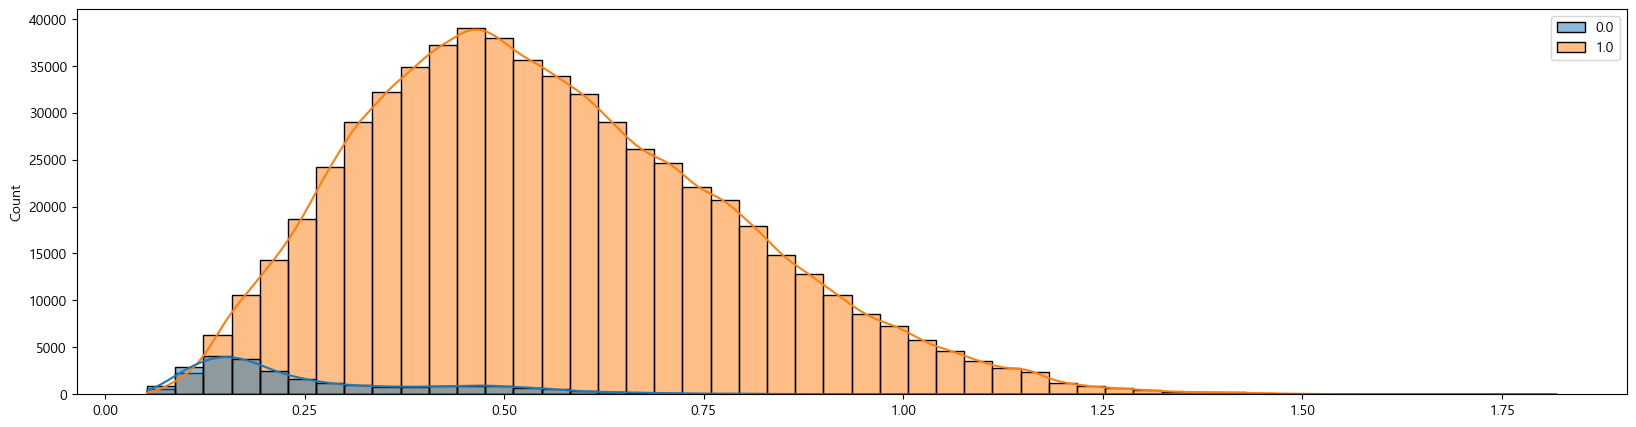

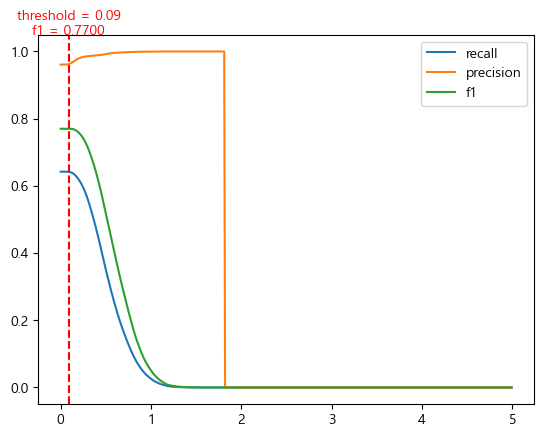

ValueError: Input contains NaN.

In [11]:
def reconstruction_error(x,p):
    return np.mean(np.abs(x - p), axis = 1)

re_normal = reconstruction_error(X_train_sc, p_train)
re_anormal = reconstruction_error(X_test_sc, p_test)

p_test.shape

re_all = np.concatenate([re_normal, re_anormal])
label_all = np.concatenate([np.zeros_like(re_normal),
                            np.ones_like(re_anormal)])

plt.figure(figsize=(20,5))
sns.histplot(x=re_all, bins=50, hue=label_all, kde=True)
plt.show()


from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve

recall = []
precision = []
f1 = []

thresholds = np.arange(0, 5, 0.01)
for thres in thresholds:
    results = re_all > thres
    recall.append(recall_score(label_all, results))
    precision.append(precision_score(label_all, results))
    f1.append(f1_score(label_all, results))

plt.figure()
plt.plot(thresholds, recall, label='recall')
plt.plot(thresholds, precision, label='precision')
plt.plot(thresholds, f1, label='f1')

plt.axvline(thresholds[np.argmax(f1)], color='red', linestyle='--')
plt.text(thresholds[np.argmax(f1)], 1.05, 'threshold = {}\nf1 = {:.4f}'.format(thresholds[np.argmax(f1)], np.max(f1)),
         color='red', horizontalalignment='center')

plt.legend()
plt.show()


fpr, tpr, _ = roc_curve(label_all, re_all)
plt.plot(fpr,tpr)
plt.show()


# 임계값(threshold) 설정 (0부터 1 사이의 값을 지정)
threshold = 0.58

# 예측 결과 계산
predicted_results = re_all > threshold

plt.figure(figsize = (12, 6))
plt.plot(data)

for idx, p in zip(data.index, predicted_results):
    if p:
        plt.axvline(idx, color='gray', alpha=0.2)
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

# 컨퓨전 매트릭스 생성
conf_matrix = confusion_matrix(label_all, predicted_results)

# 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

plt.title(f"Confusion Matrix (Threshold = {threshold})", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"], fontsize=12)
plt.yticks(ticks=[0, 1], labels=["Negative", "Positive"], fontsize=12)
plt.show()


from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(label_all, predicted_results)

# Confusion Matrix 출력
print("Confusion Matrix:")
print(conf_matrix)

# 분류 보고서 출력
target_names = ['정상치', '이상치']
print("\nClassification Report:")
print(classification_report(label_all, predicted_results, target_names=target_names))

In [12]:
predicted_results

NameError: name 'predicted_results' is not defined

In [ ]:
# 기존 데이터의 선 그래프 그리기
plt.figure(figsize=(10, 3))
sns.lineplot(data)

# 'Cluster'가 1인 부분을 반투명한 세로선으로 표시
cluster_1_data = pc_df[pc_df['Cluster'] == 1]
for index in cluster_1_data.index:
    plt.axvline(x=index, color='red', alpha=0.2)

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Cluster 1 Data in the Time Series')
plt.legend()
plt.show()